# Payment Date Prediction 


### Importing related Libraries 

In [211]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [212]:
dataset=pd.read_csv("dataset.csv")
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaN,2020,1930797071,21-04-2020,20200417,20200421,20200506,USD,RV,1,NaN,3187.86,20200421,NAA8,1.930797e+09,1
49996,U001,200769623,WAL-MAR co,03-09-2019 00:00,2019,1929744070,15-08-2019,20190814,20190815,20190830,USD,RV,1,NaN,6766.54,20190815,NAH4,1.929744e+09,0
49997,U001,200772595,SAFEW associates,05-03-2020 00:00,2020,1930536775,19-02-2020,20200218,20200219,20200305,USD,RV,1,NaN,6120.86,20200219,NAA8,1.930537e+09,0
49998,U001,200726979,BJ'S llc,12-12-2019 00:00,2019,1930198546,27-11-2019,20191126,20191127,20191212,USD,RV,1,NaN,63.48,20191127,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [213]:
dataset.shape

(50000, 19)

### Check the Detail information of the dataframe

In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [215]:
dataset.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [216]:
dataset.describe

<bound method NDFrame.describe of       business_code cust_number       name_customer        clear_date  \
0              U001   200769623        WAL-MAR corp  11-02-2020 00:00   
1              U001   200980828               BEN E  08-08-2019 00:00   
2              U001   200792734          MDV/ trust  30-12-2019 00:00   
3              CA02   140105686            SYSC llc               NaN   
4              U001   200769623  WAL-MAR foundation  25-11-2019 00:00   
...             ...         ...                 ...               ...   
49995          U001   200561861      CO corporation               NaN   
49996          U001   200769623          WAL-MAR co  03-09-2019 00:00   
49997          U001   200772595    SAFEW associates  05-03-2020 00:00   
49998          U001   200726979           BJ'S  llc  12-12-2019 00:00   
49999          U001   200020431            DEC corp  15-01-2019 00:00   

       buisness_year      doc_id posting_date  document_create_date  \
0               20

# Data Cleaning

- Show top 5 records from the dataset

In [217]:
dataset.head(6)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0
5,CA02,140106181,THE corporation,04-12-2019 00:00,2019,2960581231,20-09-2019,20190920,20190920,20191004,CAD,RV,1,NaN,22225.84,20190924,CA10,2.960581e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [218]:
dataset.isna().sum()/500

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [219]:
dataset[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [220]:
dataset[['baseline_create_date',"document_create_date",'document_create_date.1']].value_counts()

baseline_create_date  document_create_date  document_create_date.1
20200324              20200324              20200324                  82
20200325              20200325              20200325                  78
20200401              20200401              20200401                  76
20200323              20200323              20200323                  75
20200326              20200326              20200326                  72
                                                                      ..
20190916              20190911              20190916                   1
                      20190914              20190914                   1
                      20190916              20190915                   1
                      20190919              20190916                   1
20200522              20200522              20200522                   1
Length: 5852, dtype: int64

#### Please check, Column 'posting_id' is constant columns or not


In [221]:
dataset['posting_id'].value_counts()

1    50000
Name: posting_id, dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [222]:
dataset['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [223]:
dataset=dataset.drop(['document_create_date','isOpen',"document type","document_create_date.1"],axis=1)

In [224]:
dataset.shape

(50000, 15)

### Please check from the dataframe whether all the columns are removed or not 

In [225]:
dataset.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [226]:
dataset[dataset.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,1,NaN,19557.41,20190228,NAH4,1.928870e+09
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,1,NaN,5600.41,20190818,NAH4,1.929758e+09
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,1,NaN,35352.17,20191204,NAH4,1.930217e+09
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,1,NaN,2982.64,20191112,NAH4,1.930137e+09
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,1,NaN,82975.82,20200415,CA10,2.960629e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,200915438,GROC trust,15-08-2019 00:00,2019,1929645942,25-07-2019,20190809,USD,1,NaN,6969.00,20190725,NAA8,1.929646e+09
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,1,NaN,10968.24,20190113,NAH4,1.928614e+09
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,1,NaN,155837.53,20190529,NAU5,1.929403e+09
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,1,NaN,4008.05,20190522,NAA8,1.929365e+09


### Display the Number of Duplicate Rows

In [227]:
dataset.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [228]:
dataset.drop_duplicates(inplace=True,keep=False)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [229]:
dataset.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [230]:
dataset.shape

(47692, 15)

### Find out the total count of null values in each columns

In [231]:
dataset.isna().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date               9367
buisness_year               0
doc_id                      0
posting_date                0
due_in_date                 0
invoice_currency            0
posting_id                  0
area_business           47692
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  6
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [232]:
dataset.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
posting_id                int64
area_business           float64
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
invoice_id              float64
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [233]:
dataset[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [234]:
dataset[['due_in_date','baseline_create_date']]=dataset[['due_in_date','baseline_create_date']].astype(str)

In [235]:
dataset['clear_date'] = pd.to_datetime(dataset['clear_date'])
dataset['posting_date'] = pd.to_datetime(dataset['posting_date'])
dataset['due_in_date'] = pd.to_datetime(dataset['due_in_date'],format='%Y%m%d')
dataset['baseline_create_date'] = pd.to_datetime(dataset['baseline_create_date'],format='%Y%m%d')


In [236]:
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,1,NaN,54273.28,2020-01-26,NAH4,1.930438e+09
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,1,NaN,79656.60,2019-07-22,NAD1,1.929646e+09
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,1,NaN,2253.86,2019-09-14,NAA8,1.929874e+09
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,1,NaN,3299.70,2020-03-31,CA10,2.960623e+09
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,1,NaN,33133.29,2019-11-13,NAH4,1.930148e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaT,2020,1930797071,2020-04-21,2020-05-06,USD,1,NaN,3187.86,2020-04-21,NAA8,1.930797e+09
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,USD,1,NaN,6766.54,2019-08-15,NAH4,1.929744e+09
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,USD,1,NaN,6120.86,2020-02-19,NAA8,1.930537e+09
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,USD,1,NaN,63.48,2019-11-27,NAA8,1.930199e+09


### Please check the datatype of all the columns after conversion of the above 4 columns

In [237]:
dataset[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [238]:
dataset['invoice_currency'].value_counts()

USD    43953
CAD     3739
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [239]:
dataset["total_open_amount"]

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 47692, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [240]:
def conversion(x,y):
    lst=[]
    for i in range(len(x)):
        if x[i]=='CAD':
            lst.append(y[i]*0.7)
        else:
            lst.append(y[i])
    return lst

dataset['converted_usd']=conversion(list(dataset['invoice_currency']),list(dataset['total_open_amount']))

### Display the new "converted_usd" column values

In [241]:
dataset['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 47692, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [242]:
dataset["buisness_year"].value_counts()

2019    33242
2020    14450
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [243]:
dataset=dataset.drop(['invoice_currency','total_open_amount'],axis=1)

### Write a code to check the number of columns in dataframe

In [244]:
dataset.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date', 'posting_id',
       'area_business', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'converted_usd'],
      dtype='object')

In [245]:
dataset=dataset.drop('area_business',axis=1)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [246]:
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.28
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.60
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.86
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,1,2020-03-31,CA10,2.960623e+09,2309.79
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaT,2020,1930797071,2020-04-21,2020-05-06,1,2020-04-21,NAA8,1.930797e+09,3187.86
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.54
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.86
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.48


#### Find out the number of null values from the column that you got from the above code

In [247]:
dataset.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9367
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
posting_id                 0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 6
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [248]:
main_train=dataset[dataset.clear_date.isnull()==False]
main_test=dataset[dataset.clear_date.isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [249]:
main_train.shape

(38325, 13)

In [250]:
main_test.shape

(9367, 13)

### Display the 5 records from maindata and nulldata dataframes

In [251]:
main_train.head(6)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088
6,U001,200769623,WAL-MAR in,2019-12-11,2019,1930083373,2019-01-11,2019-11-16,1,2019-11-01,NAH4,1.930083e+09,7358.490


In [252]:
main_test.head(6)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,1,2020-03-31,CA10,2.960623e+09,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,1,2020-03-19,NAA8,1.930659e+09,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,1,2020-03-11,NAA8,1.930611e+09,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,1,2020-04-15,NAA8,1.930788e+09,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,1,2020-04-16,NAM2,1.930817e+09,3726.06
22,U001,200744019,TARG associates,NaT,2020,1930676042,2020-03-21,2020-04-05,1,2020-03-21,NAA8,1.930676e+09,5893.01


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [253]:
main_train['delay']=main_train['clear_date']-main_train['due_in_date']
main_train['delay']=main_train['delay'].dt.days

In [254]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd,delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280,266
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600,-3
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860,92
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290,-3
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088,-175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,1,2019-07-10,NAC6,1.929601e+09,84780.400,0
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.540,-174
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.860,59
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.480,0


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [255]:
avg_delay = main_train.groupby('name_customer')['delay'].mean(numeric_only=False)
avg_delay

name_customer
11078 us               -69.0
17135 associates       -10.0
17135 llc               -3.0
236008 associates       -3.0
99 CE                   16.0
                        ... 
YEN BROS corp            0.0
YEN BROS corporation    -0.5
YEN BROS llc            -2.0
ZARCO co                -1.0
ZIYAD  us              -83.0
Name: delay, Length: 3852, dtype: float64

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [256]:
main_train['avg_delay']=main_train['name_customer'].map(avg_delay)

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [257]:
main_train['avg_delay'] = pd.to_timedelta(main_train['avg_delay']).view(np.int64)*24*60*60

### Display the maindata dataframe 

In [258]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd,delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280,266,172800
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600,-3,2160000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860,92,2505600
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290,-3,345600
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088,-175,4147200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,1,2019-07-10,NAC6,1.929601e+09,84780.400,0,-777600
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.540,-174,-86400
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.860,59,172800
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.480,0,1468800


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [259]:
main_train=main_train.drop(['delay','clear_date'],axis=1)

In [260]:
main_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280,172800
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600,2160000
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860,2505600
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290,345600
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088,4147200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,1,2019-07-10,NAC6,1.929601e+09,84780.400,-777600
49996,U001,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.540,-86400
49997,U001,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.860,172800
49998,U001,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.480,1468800


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [261]:
y=main_train["avg_delay"]
y

0         172800
1        2160000
2        2505600
4         345600
5        4147200
          ...   
49994    -777600
49996     -86400
49997     172800
49998    1468800
49999    -691200
Name: avg_delay, Length: 38325, dtype: int64

In [262]:
x=main_train.drop('avg_delay',axis=1)
x

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,1,2019-07-10,NAC6,1.929601e+09,84780.400
49996,U001,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.540
49997,U001,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.860
49998,U001,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.480


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [263]:
from sklearn.model_selection import train_test_split
x_train,x_loc_test,y_train,y_loc_test=train_test_split(x,y,test_size=0.4,random_state=0,shuffle=False)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [264]:
x_train.shape,x_loc_test.shape,y_train.shape,y_loc_test.shape

((22995, 12), (15330, 12), (22995,), (15330,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [265]:
x_val,x_test,y_val,y_test=train_test_split(x_loc_test,y_loc_test,test_size=0.5,random_state=0,shuffle=False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [266]:
x_train.shape,x_val.shape,x_test.shape

((22995, 12), (7665, 12), (7665, 12))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='due_in_date', ylabel='Density'>

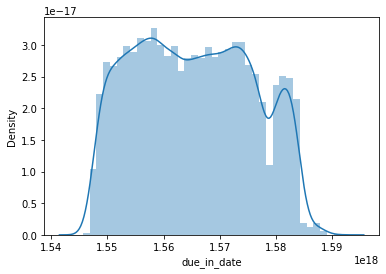

In [267]:
sns.distplot(x_train['due_in_date'])

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [268]:
Consumer= x_train.groupby(by=['name_customer'],as_index=False)['doc_id'].count()
Consumer

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,236008 associates,1
3,99 CE,2
4,99 CE associates,1
...,...,...
3050,YAEGER in,1
3051,YEN BROS,1
3052,YEN BROS corporation,1
3053,YEN BROS llc,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

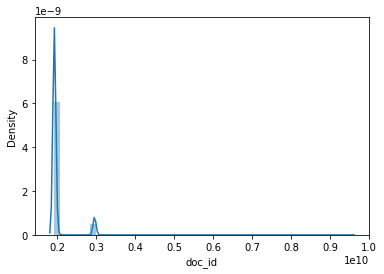

In [269]:
sns.distplot(x_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

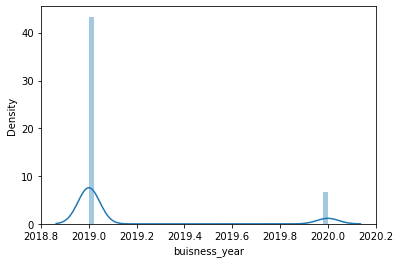

In [270]:
sns.distplot(x_train["buisness_year"])

<AxesSubplot:ylabel='Density'>

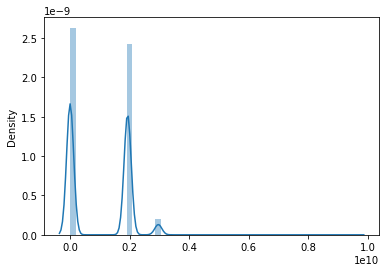

In [271]:
sns.distplot(x_train[["buisness_year","doc_id"]])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [272]:
x_train.describe

<bound method NDFrame.describe of       business_code cust_number       name_customer  buisness_year  \
0              U001   200769623        WAL-MAR corp           2020   
1              U001   200980828               BEN E           2019   
2              U001   200792734          MDV/ trust           2019   
4              U001   200769623  WAL-MAR foundation           2019   
5              CA02   140106181    THE  corporation           2019   
...             ...         ...                 ...            ...   
29913          U001   200778870             C trust           2019   
29914          U001   200769623         WAL-MAR llc           2019   
29915          U001   200780383           MEIJ corp           2020   
29916          U001   200769623          WAL-MAR co           2019   
29917          U001   200418007       AM associates           2019   

           doc_id posting_date due_in_date  posting_id baseline_create_date  \
0      1930438491   2020-01-26  2020-02-10    

In [273]:
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088
...,...,...,...,...,...,...,...,...,...,...,...,...
29913,U001,200778870,C trust,2019,1928581672,2019-08-01,2019-01-23,1,2019-01-08,NAA8,1.928582e+09,2125.560
29914,U001,200769623,WAL-MAR llc,2019,1928726971,2019-03-02,2019-02-18,1,2019-02-03,NAH4,1.928727e+09,16157.020
29915,U001,200780383,MEIJ corp,2020,1930400908,2020-01-14,2020-01-29,1,2020-01-14,NAA8,1.930401e+09,54781.230
29916,U001,200769623,WAL-MAR co,2019,1929349275,2019-05-21,2019-06-05,1,2019-05-21,NAH4,1.929349e+09,11468.170


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [274]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(x_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [275]:
x_train['business_code_enc'] = business_coder.fit_transform(x_train['business_code'])

In [276]:
x_val['business_code_enc'] = business_coder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_coder.transform(x_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [277]:
x_train[["business_code","business_code_enc"]]

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
4,U001,1
5,CA02,0
...,...,...
29913,U001,1
29914,U001,1
29915,U001,1
29916,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [278]:
def custom(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [279]:
x_train,x_val,x_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [280]:
x_train['cust_number'] = x_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_test['cust_number'] = x_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_val['cust_number'] = x_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [281]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [282]:
label_encoder = EncoderExt()
label_encoder.fit(x_train['name_customer'])
x_train['name_customer_enc']=label_encoder.transform(x_train['name_customer'])
x_val['name_customer_enc']=label_encoder.transform(x_val['name_customer'])
x_test['name_customer_enc']=label_encoder.transform(x_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [283]:
x_train ,x_val, x_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [284]:
label_encoder1 = EncoderExt()
label_encoder1.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc']=label_encoder1.transform(x_train['cust_payment_terms'])
x_val['cust_payment_terms_enc']=label_encoder1.transform(x_val['cust_payment_terms'])
x_test['cust_payment_terms_enc']=label_encoder1.transform(x_test['cust_payment_terms'])

In [285]:
x_train ,x_val, x_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [286]:
x_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
posting_id                         int64
baseline_create_date      datetime64[ns]
invoice_id                       float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [287]:
x_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
posting_id                         int64
baseline_create_date      datetime64[ns]
invoice_id                       float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [288]:
x_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
posting_id                         int64
baseline_create_date      datetime64[ns]
invoice_id                       float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [289]:
x_train['day_of_postingdate'] = x_train['posting_date'].dt.day
x_train['month_of_postingdate'] = x_train['posting_date'].dt.month
x_train['year_of_postingdate'] = x_train['posting_date'].dt.year

x_val['day_of_postingdate'] = x_val['posting_date'].dt.day
x_val['month_of_postingdate'] = x_val['posting_date'].dt.month
x_val['year_of_postingdate'] = x_val['posting_date'].dt.year


x_test['day_of_postingdate'] = x_test['posting_date'].dt.day
x_test['month_of_postingdate'] = x_test['posting_date'].dt.month
x_test['year_of_postingdate'] = x_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [290]:
x_train ,x_val, x_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [291]:
x_train

,cust_number,buisness_year,doc_id,due_in_date,posting_id,baseline_create_date,invoice_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate
0,200769623,2020,1930438491,2020-02-10,1,2020-01-26,1.930438e+09,54273.280,1,2953,32,26,1,2020
1,200980828,2019,1929646410,2019-08-11,1,2019-07-22,1.929646e+09,79656.600,1,289,27,22,7,2019
2,200792734,2019,1929873765,2019-09-29,1,2019-09-14,1.929874e+09,2253.860,1,1825,20,14,9,2019
4,200769623,2019,1930147974,2019-11-28,1,2019-11-13,1.930148e+09,33133.290,1,2955,32,13,11,2019
5,140106181,2019,2960581231,2019-10-04,1,2019-09-24,2.960581e+09,15558.088,0,2779,5,20,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29913,200778870,2019,1928581672,2019-01-23,1,2019-01-08,1.928582e+09,2125.560,1,418,20,1,8,2019
29914,200769623,2019,1928726971,2019-02-18,1,2019-02-03,1.928727e+09,16157.020,1,2957,32,2,3,2019
29915,200780383,2020,1930400908,2020-01-29,1,2020-01-14,1.930401e+09,54781.230,1,1830,20,14,1,2020
29916,200769623,2019,1929349275,2019-06-05,1,2019-05-21,1.929349e+09,11468.170,1,2952,32,21,5,2019


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [292]:
x_train ,x_val, x_test = custom(["baseline_create_date"])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [293]:
x_train["day_of_due"] = x_train["due_in_date"].dt.day
x_train["month_of_due"] = x_train["due_in_date"].dt.month
x_train["year_of_due"] = x_train["due_in_date"].dt.year

x_val["day_of_due"] = x_val["due_in_date"].dt.day
x_val["month_of_due"] = x_val["due_in_date"].dt.month
x_val["year_of_due"] = x_val["due_in_date"].dt.year


x_test["day_of_due"] = x_test["due_in_date"].dt.day
x_test["month_of_due"] = x_test["due_in_date"].dt.month
x_test["year_of_due"] = x_test["due_in_date"].dt.year


pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [294]:
x_train ,x_val, x_test = custom(["due_in_date"])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [295]:
x_train.dtypes , x_test.dtypes, x_val.dtypes

(cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 posting_id                  int64
 invoice_id                float64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_due                  int64
 month_of_due                int64
 year_of_due                 int64
 dtype: object,
 cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 posting_id                  int64
 invoice_id                float64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_due                  int64
 mon

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [296]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)
len(x_train.columns[constant_filter.get_support()])

14

- Note - Keep the code as it is, no need to change 


In [297]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

1


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [298]:
x_train_T = x_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [299]:
def handling_correlation(x_train,threshold=0.8):
    corr_features = set()
    corr_matrix = x_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [300]:
train=x_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['invoice_id', 'year_of_postingdate', 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

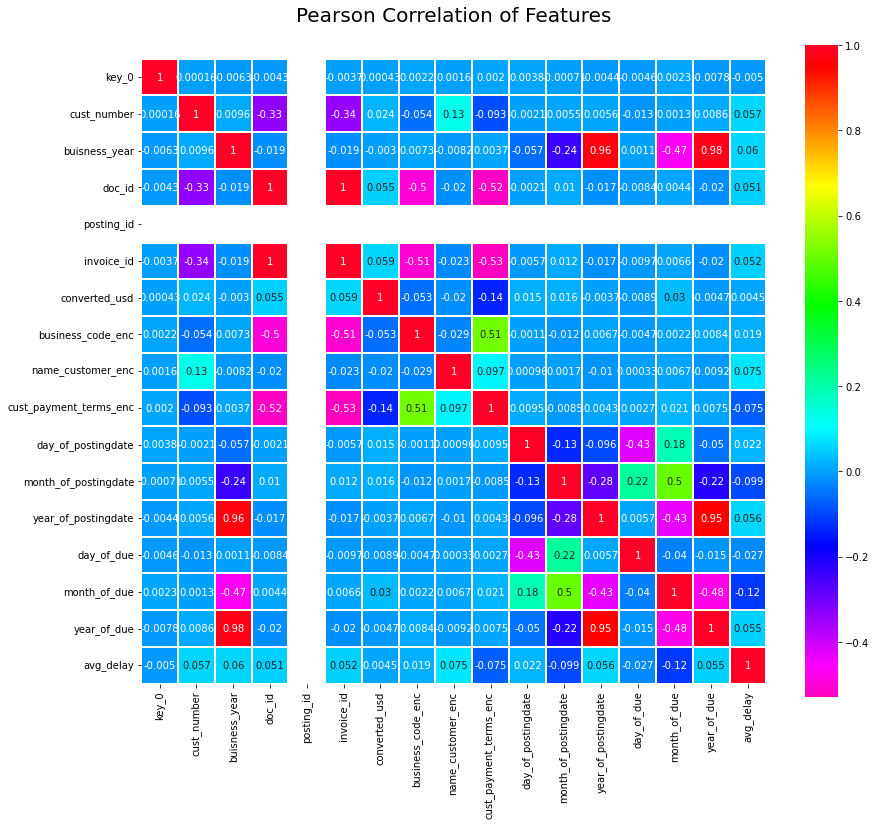

In [301]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [302]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [303]:
sel.variances_

array([1.80240952e+15, 1.15651212e-01, 8.17756859e+16, 0.00000000e+00,
       7.69056290e+16, 1.34311296e+09, 2.89474211e-01, 1.04733102e+06,
       1.17076153e+02, 8.15150274e+01, 1.18979653e+01, 1.16255512e-01,
       7.61082670e+01, 1.20601303e+01, 1.19081190e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [304]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [305]:
### You need to start with the baseline model Linear Regression

###- Step 1 : Call the Linear Regression from sklearn library
###- Step 2 : make an object of Linear Regression 
###- Step 3 : fit the X_train and y_train dataframe into the object 
###- Step 4 : Predict the output by passing the X_test Dataset into predict function




###- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [306]:
x_train=x.dropna(subset=['invoice_id'])
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,1,2019-09-24,CA10,2.960581e+09,15558.088
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,1,2019-07-10,NAC6,1.929601e+09,84780.400
49996,U001,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.540
49997,U001,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.860
49998,U001,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.480


In [307]:
x_train=x_train.drop('business_code',axis=1)

In [308]:
x_train=x_train.drop('posting_id',axis=1)

In [319]:
x_train

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,1.930438e+09,54273.280
1,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,1.929646e+09,79656.600
2,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,1.929874e+09,2253.860
4,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,1.930148e+09,33133.290
5,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,2.960581e+09,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,1.929601e+09,84780.400
49996,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,1.929744e+09,6766.540
49997,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,1.930537e+09,6120.860
49998,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,1.930199e+09,63.480


In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [312]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[],[],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('Support_vector_regression')
svr = SVR()
svr.fit(X_train, y_train)
predicted= svr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

### Display The Comparison Lists

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [336]:
y_test

39920     432000
39921   -1296000
39922     345600
39923      86400
39924     518400
          ...   
49994    -777600
49996     -86400
49997     172800
49998    1468800
49999    -691200
Name: avg_delay, Length: 7665, dtype: int64

### Check the same for the Validation set also 

### Display The Comparison Lists

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


## You need to make the comparison list into a comparison dataframe 

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

### Calculate the R2 score for test

### Calculate the R2 score for Validation

### Calculate the Accuracy for train Dataset 

### Calculate the accuracy for validation

### Calculate the accuracy for test

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

### Check for the number of rows and columns in the nulldata

### Check the Description and Information of the nulldata 

### Storing the Nulldata into a different dataset 
# for BACKUP

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

### Check the information of the "nulldata" dataframe

In [345]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 39920 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7665 non-null   int32  
 1   buisness_year           7665 non-null   int64  
 2   doc_id                  7665 non-null   int64  
 3   posting_id              7665 non-null   int64  
 4   invoice_id              7664 non-null   float64
 5   converted_usd           7665 non-null   float64
 6   business_code_enc       7665 non-null   int32  
 7   name_customer_enc       7665 non-null   int32  
 8   cust_payment_terms_enc  7665 non-null   int32  
 9   day_of_postingdate      7665 non-null   int64  
 10  month_of_postingdate    7665 non-null   int64  
 11  year_of_postingdate     7665 non-null   int64  
 12  day_of_due              7665 non-null   int64  
 13  month_of_due            7665 non-null   int64  
 14  year_of_due             7665 non-nu

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [347]:
x_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'posting_id', 'invoice_id',
       'converted_usd', 'business_code_enc', 'name_customer_enc',
       'cust_payment_terms_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

### Now you can pass this dataset into you final model and store it into "final_result"

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

### Check for the Number of Rows and Columns in your "Final" dataframe 

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [119]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

NameError: name 'Final' is not defined

### Display the "clear_date" column

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [121]:

bins= ___________________
labels =__________________________
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

NameError: name '_________bins__________' is not defined

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

### Display the count of each categoty of new "Aging Bucket" column 

### Display your final dataset with aging buckets 

In [313]:
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,1,2020-01-26,NAH4,1.930438e+09,54273.28
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,1,2019-07-22,NAD1,1.929646e+09,79656.60
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,1,2019-09-14,NAA8,1.929874e+09,2253.86
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,1,2020-03-31,CA10,2.960623e+09,2309.79
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,1,2019-11-13,NAH4,1.930148e+09,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaT,2020,1930797071,2020-04-21,2020-05-06,1,2020-04-21,NAA8,1.930797e+09,3187.86
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,1,2019-08-15,NAH4,1.929744e+09,6766.54
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,1,2020-02-19,NAA8,1.930537e+09,6120.86
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,1,2019-11-27,NAA8,1.930199e+09,63.48


### Store this dataframe into the .csv format

# END OF THE PROJECT